# **PCA and MNIST**

This notebook explores **Principal Component Analysis (PCA)** and its application to the **MNIST dataset**, which consists of handwritten digit images. The aim is to reduce dimensionality while preserving key information and to analyse how PCA affects classification performance when using a neural network.

---

## **1. Importing Necessary Libraries**

The notebook begins by importing essential libraries for numerical computation, visualisation, and machine learning. NumPy is used for mathematical operations, Matplotlib for plotting, SciPy for linear algebra functions, and TensorFlow/Keras for training a neural network.

---


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

from scipy import linalg

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.18.0


---

## **2. Loading and Preprocessing the MNIST Dataset**

The MNIST dataset is loaded and consists of grayscale images of handwritten digits (0-9). Each image is **28×28 pixels** in size. Before processing, the pixel values are normalised to be within the range \([0,1]\), which helps optimise model performance.

---

In [2]:
# Importing MNIST data
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #Unpack the data

#Scaling
train_images=train_images/255.0
test_images=test_images/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


---
## **3. Neural Network Model**

A simple fully connected **Multi-Layer Perceptron (MLP)** model is built to classify MNIST digits. The model consists of:

- A **Flatten layer** to convert 2D images into 1D feature vectors.
- A **Dense hidden layer** with **ReLU activation** to introduce non-linearity.
- A **Dense output layer** with 10 neurons, corresponding to the 10 digit classes.

The model is compiled with the **Sparse Categorical Crossentropy** loss function and trained using the **Stochastic Gradient Descent (SGD)** optimiser. Training runs for multiple epochs until a satisfactory accuracy is achieved.

---

In [3]:
model = keras.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])


# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),
              metrics=['accuracy'])

# Train the model and time it
start_time = time.time()
history = model.fit(train_images, train_labels, batch_size=500, epochs=8) #Achieves >95% accuracy reliably after ~ Epoch 6, so used 8 Epochs for efficiency and to avoid overfitting
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

# Evaluate the model
print(np.shape(test_images))
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7403 - loss: 0.8343
Epoch 2/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9311 - loss: 0.2386
Epoch 3/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9479 - loss: 0.1831
Epoch 4/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9564 - loss: 0.1531
Epoch 5/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9633 - loss: 0.1316
Epoch 6/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9671 - loss: 0.1155
Epoch 7/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9715 - loss: 0.0997
Epoch 8/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9739 - loss: 0.0928
Training time: 11.937357187271118 seconds
(10000, 28, 28)
313/313 - 1s - 3ms/step - accuracy: 0.9698 - loss: 0.1025

Test accuracy: 0.9697999954223633


---
## **4. Principal Component Analysis (PCA)**

PCA is used to reduce the dimensionality of the dataset while preserving the most important features. This helps decrease computational complexity and improve efficiency.

### **Projection and Transformation**

The key mathematical operations in PCA include:

- **Computing the covariance matrix** to capture relationships between features.
- **Performing eigendecomposition** to obtain the principal components.
- **Projecting the data** onto a lower-dimensional subspace using:

$$
y = V^T V x
$$

where \( V \) contains the eigenvectors of the covariance matrix, and \( y \) represents the transformed data in the reduced space.

The data is transformed using:

$$
P = x v
$$

where \( P \) is the projection of the original data \( x \) onto a principal component \( v \).

---

In [4]:
# PCA Calculations
X=np.reshape(train_images,(60000,784))
print("X.shape:",np.shape(X))

mu=np.mean(X,axis=0)
x=X-mu
rho=np.cov(x,rowvar=False) # Make the covaraince matrix by np.cov
print("rho.shape:",np.shape(rho))

#Get the eigenvalues and vectors
vals,vecs=linalg.eigh(rho)
#vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
# eigenvectors such that vecs[:,i] is the eigenvector correspondong to vals[i]
print("vecs.shape:",np.shape(vecs))
print("vals.shape:",np.shape(vals))
vecs=np.flip(vecs)
vals=np.flip(vals)

P = np.dot(x, vecs)  # Project data onto eigenvectors
print("x.shape:", x.shape)
print("P.shape:", P.shape)

X.shape: (60000, 784)
rho.shape: (784, 784)
vecs.shape: (784, 784)
vals.shape: (784,)
x.shape: (60000, 784)
P.shape: (60000, 784)


---
## **5. Applying PCA to MNIST**

PCA is applied to the MNIST dataset, reducing the number of dimensions from **784 (28×28)** to a lower number, such as **50 principal components**. This transformation removes redundant information while retaining essential features.

By visualising the first few principal components, we observe that they capture broad structural patterns in the digit images, such as edges and curves.

---


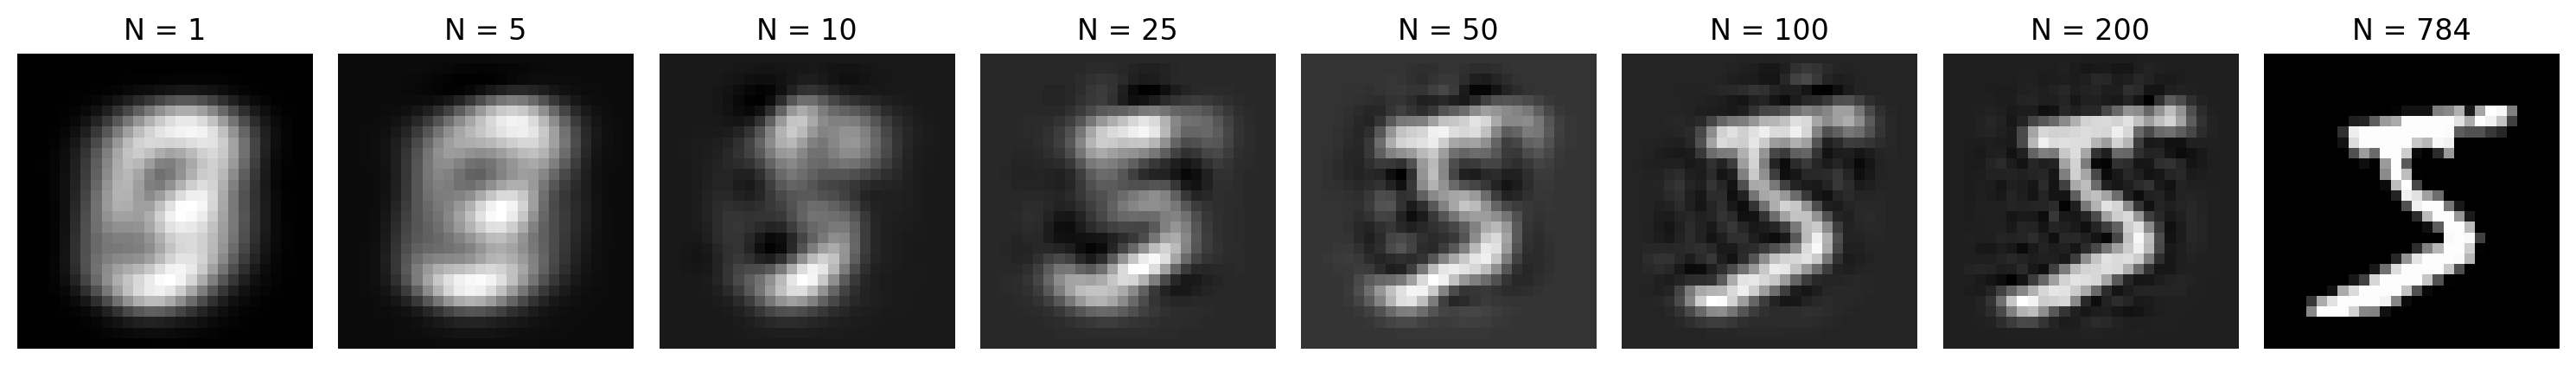

In [5]:
# Plotting reconstructed images
fig, axes = plt.subplots(1, 8, figsize=(15, 8))

# Choose intervals of N for plotting
N_values_to_plot = [1, 5, 10, 25, 50, 100, 200, 784]

# Iterate through subplots and N values
for i, n in enumerate(N_values_to_plot):
    reconstructed_image = (np.dot(P[:, :n], vecs.T[:n, :])) + mu
    reconstructed_image = reconstructed_image.reshape(-1, 28, 28)

    axes[i].imshow(reconstructed_image[0], cmap='gray')
    axes[i].set_title(f"N = {n}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

---
## **6. Evaluating PCA’s Impact on Classification**

After applying PCA, the reduced dataset is fed into the neural network to assess whether the classification performance changes compared to using the full dataset. A **trade-off** is observed between computational efficiency and classification accuracy, depending on the number of retained principal components.

---

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1284 - loss: 3.2401
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7920 - loss: 0.5994
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9155 - loss: 0.2686
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9471 - loss: 0.1723
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9589 - loss: 0.1389
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9647 - loss: 0.1220
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9668 - loss: 0.1136
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9693 - loss: 0.1076
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9703 - loss: 0.1041
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9708 - loss: 0.1016
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9715 - loss: 0.0990
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9720 - loss: 0.0971
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9727 - loss: 0.0958

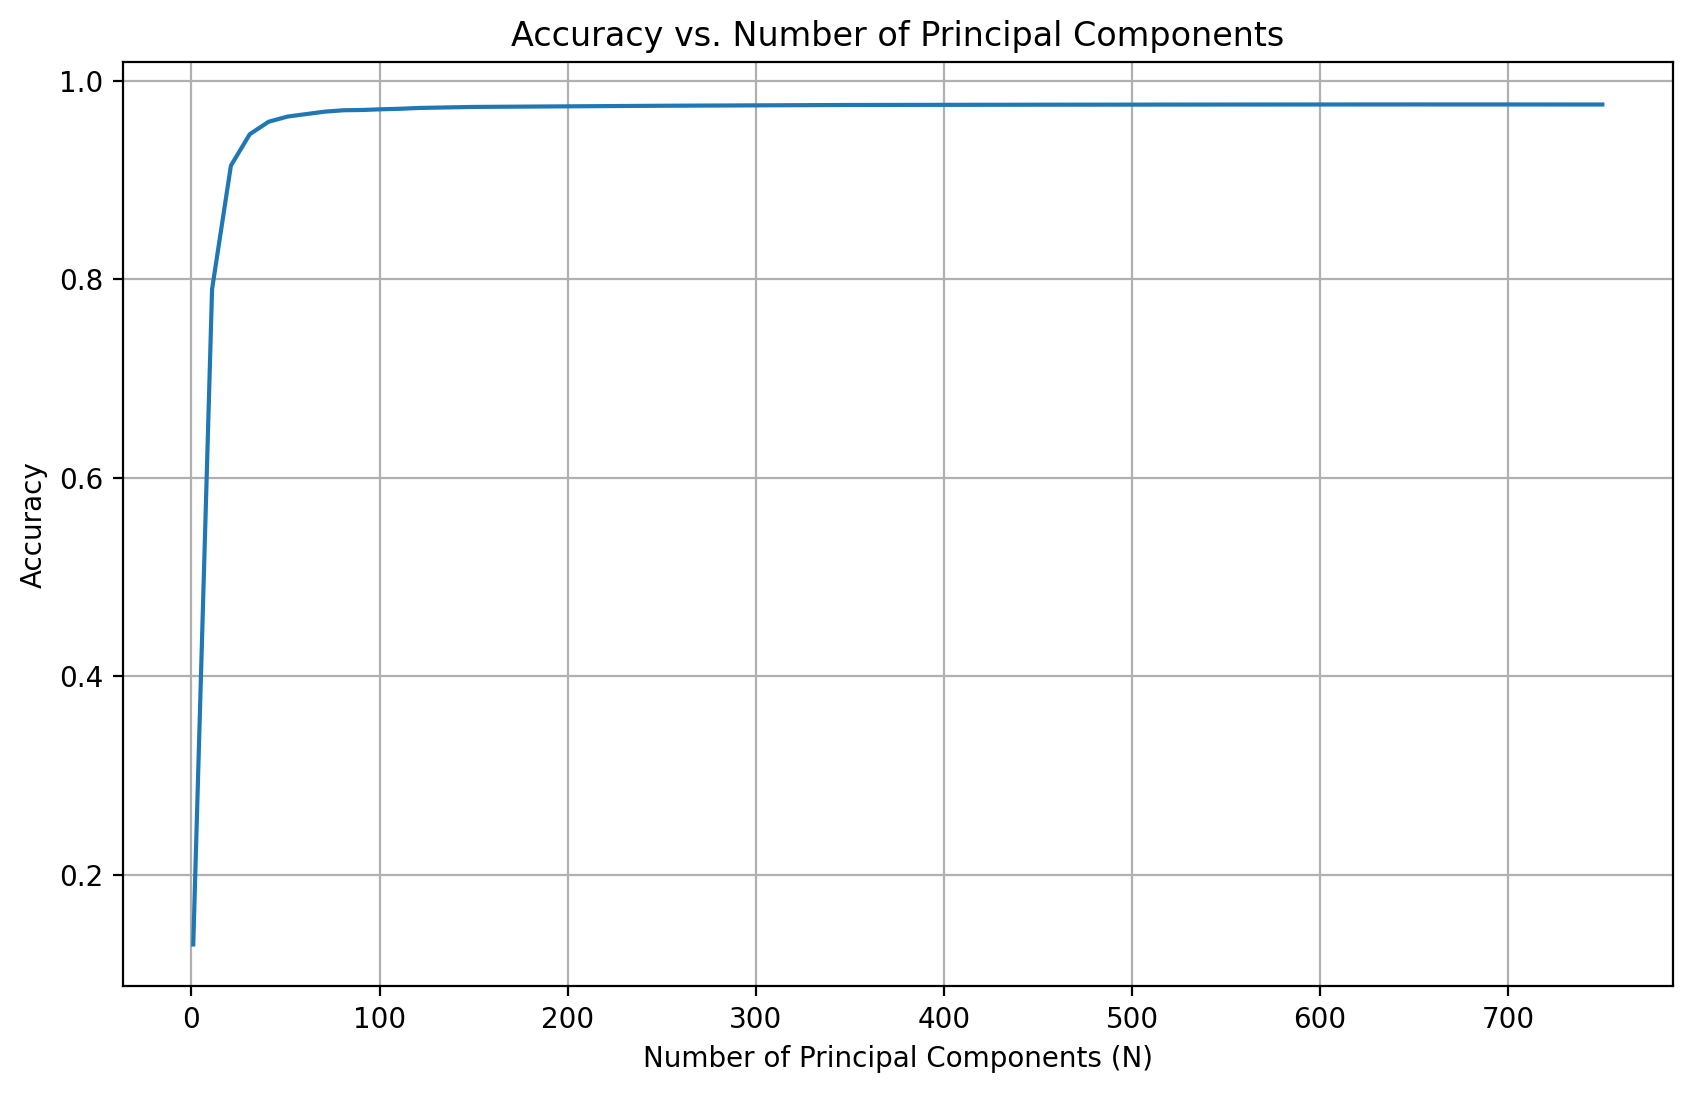

In [6]:
N_components = list(range(1, 130, 10))  # More values for n (interesting observable things in this range)
N_components.extend(range(150, 784, 100)) # Add values from 200 to 784 in spaces of 100
accuracies = []

# Calculate accuracies for different n
for n in N_components:
    reconstructed_image = (np.dot(P[:, :n], vecs.T[:n, :])) + mu  # Reconstruct image
    reconstructed_image = reconstructed_image.reshape(-1, 28, 28)
    _, accuracy = model.evaluate(reconstructed_image, train_labels, verbose=1)  # Evaluate
    accuracies.append(accuracy)

# Plot accuracy against n
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(N_components, accuracies)
ax.set_xlabel("Number of Principal Components (N)")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs. Number of Principal Components")
ax.grid(True)
plt.show()

---
## **7. The New Model: Incorporating PCA in Training**

The new model integrates **Principal Component Analysis (PCA)** before training, aiming to reduce dimensionality while maintaining classification performance. Instead of using the full **784-dimensional** feature space, the model is trained on a **compressed representation** of the dataset.

---

In [7]:
# Reconstruct images with 100 components
newImage100 = (np.dot(P[:, :100], vecs.T[:100, :])) + mu
newImage100 = newImage100.reshape(-1, 28, 28)

# Create a new model (same architecture as before)
new_model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compile the new model
new_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),
                  metrics=['accuracy'])

# Train the new model on the reconstructed images
start_time = time.time()
history_new_model = new_model.fit(newImage100, train_labels, batch_size=500, epochs=8)
end_time = time.time()
training_time_100 = end_time - start_time
print(f"Training time: {training_time_100} seconds")

# Evaluate the new model on the original test images
test_loss_new_model, test_acc_new_model = new_model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy (new model):', test_acc_new_model)

Epoch 1/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7517 - loss: 0.8098
Epoch 2/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9270 - loss: 0.2492
Epoch 3/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9485 - loss: 0.1798
Epoch 4/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9572 - loss: 0.1505
Epoch 5/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9631 - loss: 0.1314
Epoch 6/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9680 - loss: 0.1138
Epoch 7/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9710 - loss: 0.1004
Epoch 8/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9755 - loss: 0.0892
Training time: 10.775492191314697 seconds
313/313 - 1s - 2ms/step - accuracy: 0.9716 - loss: 0.0987

Test accuracy (new model): 0.9715999960899353


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1889 - loss: 3.2540
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7845 - loss: 0.6139
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9254 - loss: 0.2421
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9586 - loss: 0.1445
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9671 - loss: 0.1158
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9724 - loss: 0.1020
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9739 - loss: 0.0939
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9752 - loss: 0.0893
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9768 - loss: 0.0860
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9777 - loss: 0.0837
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9779 - loss: 0.0823
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9779 - loss: 0.0825
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9780 - loss: 0.0828

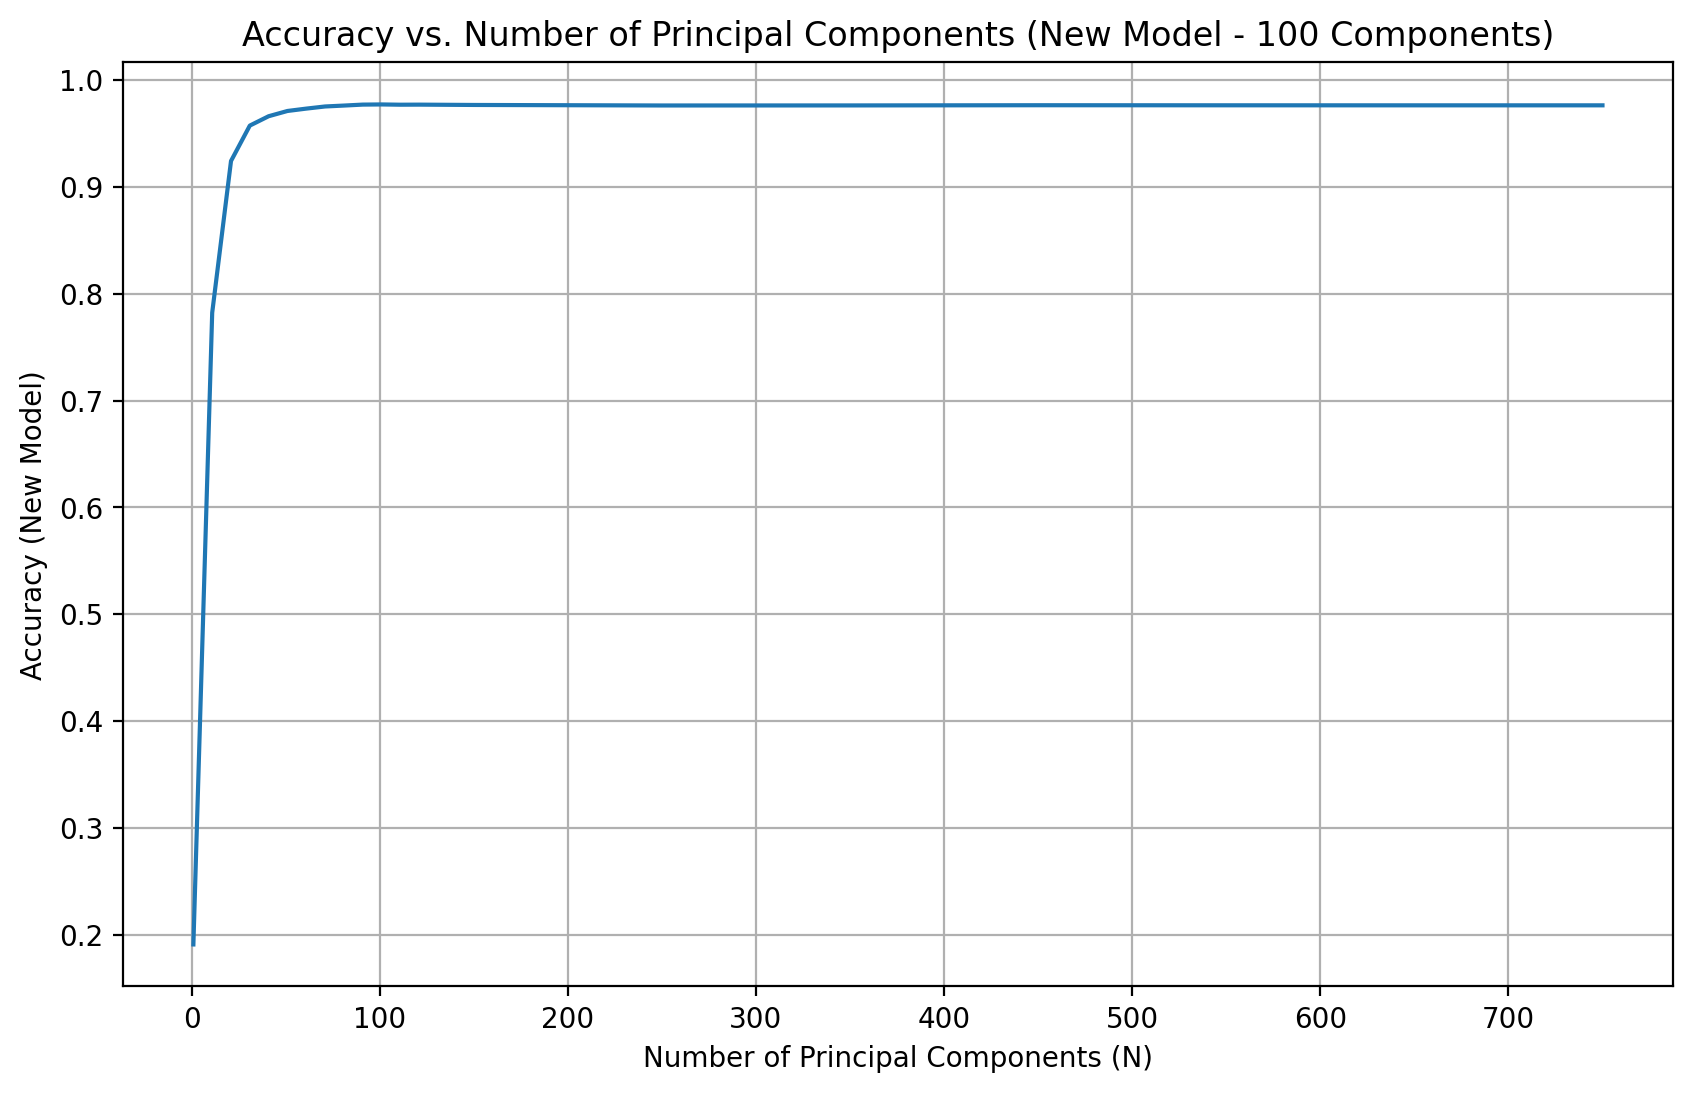

In [8]:
accuracies_new_model = []  # List to store accuracies for the new model

for n in N_components:
    reconstructed_image = (np.dot(P[:, :n], vecs.T[:n, :])) + mu  # Reconstruct
    reconstructed_image = reconstructed_image.reshape(-1, 28, 28)

    # Evaluate the new model and store accuracy
    _, accuracy = new_model.evaluate(reconstructed_image, train_labels, verbose=1)
    accuracies_new_model.append(accuracy)

# Plot accuracy against n for the new model
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(N_components, accuracies_new_model)
ax.set_xlabel("Number of Principal Components (N)")
ax.set_ylabel("Accuracy (New Model)")
ax.set_title("Accuracy vs. Number of Principal Components (New Model - 100 Components)")
ax.grid(True)
plt.show()

In [9]:
# Reconstruct images with 20 components
newImage20 = (np.dot(P[:, :20], vecs.T[:20, :])) + mu  # Changed to 20 components
newImage20 = newImage20.reshape(-1, 28, 28)

# Create a new model (same architecture as before)
new_model_20 = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compile the new model
new_model_20.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),
                  metrics=['accuracy'])

# Train the new model on the reconstructed images
start_time = time.time()
history_new_model_20 = new_model_20.fit(newImage20, train_labels, batch_size=500, epochs=8)
end_time = time.time()
training_time_20 = end_time - start_time
print(f"Training time: {training_time_20} seconds")

# Evaluate the new model on the original test images
test_loss_new_model_20, test_acc_new_model_20 = new_model_20.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy (new model):', test_acc_new_model_20)

Epoch 1/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7083 - loss: 0.9270
Epoch 2/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9019 - loss: 0.3266
Epoch 3/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9265 - loss: 0.2465
Epoch 4/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9386 - loss: 0.2094
Epoch 5/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9471 - loss: 0.1782
Epoch 6/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9499 - loss: 0.1682
Epoch 7/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9540 - loss: 0.1547
Epoch 8/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9589 - loss: 0.1406
Training time: 10.46151328086853 seconds
313/313 - 1s - 2ms/step - accuracy: 0.9477 - loss: 0.1632

Test accuracy (new model): 0.947700023651123


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0963 - loss: 3.1496
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8435 - loss: 0.4548
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9572 - loss: 0.1408
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9542 - loss: 0.1462
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9532 - loss: 0.1508
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9529 - loss: 0.1530
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9517 - loss: 0.1560
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9507 - loss: 0.1571
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9508 - loss: 0.1584
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9506 - loss: 0.1598
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9507 - loss: 0.1599
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9509 - loss: 0.1601
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9500 - loss: 0.1609

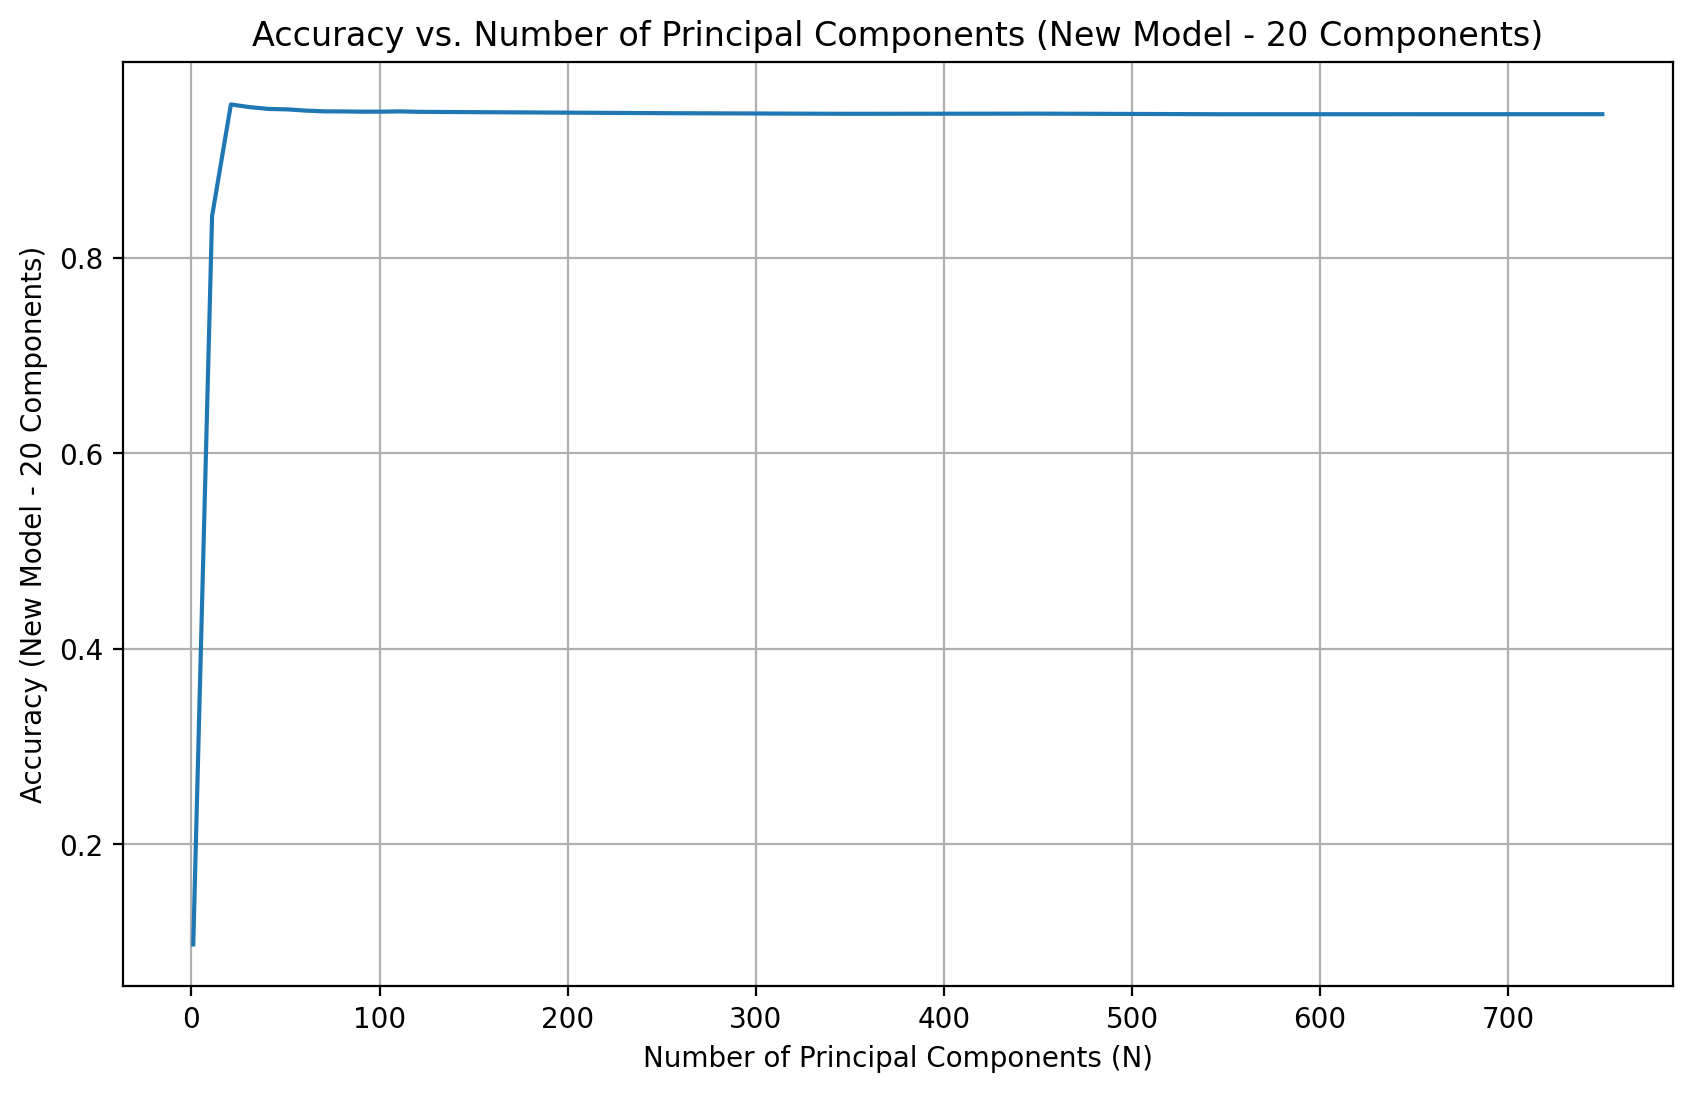

In [10]:
accuracies_new_model_20 = []  # List to store accuracies for new_model_20

for n in N_components:
    reconstructed_image = (np.dot(P[:, :n], vecs.T[:n, :])) + mu
    reconstructed_image = reconstructed_image.reshape(-1, 28, 28)

    # Evaluate new_model_20 and store accuracy
    _, accuracy = new_model_20.evaluate(reconstructed_image, train_labels, verbose=1)
    accuracies_new_model_20.append(accuracy)

# Plot accuracy against n for new_model_20
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(N_components, accuracies_new_model_20)
ax.set_xlabel("Number of Principal Components (N)")
ax.set_ylabel("Accuracy (New Model - 20 Components)")
ax.set_title("Accuracy vs. Number of Principal Components (New Model - 20 Components)")
ax.grid(True)
plt.show()

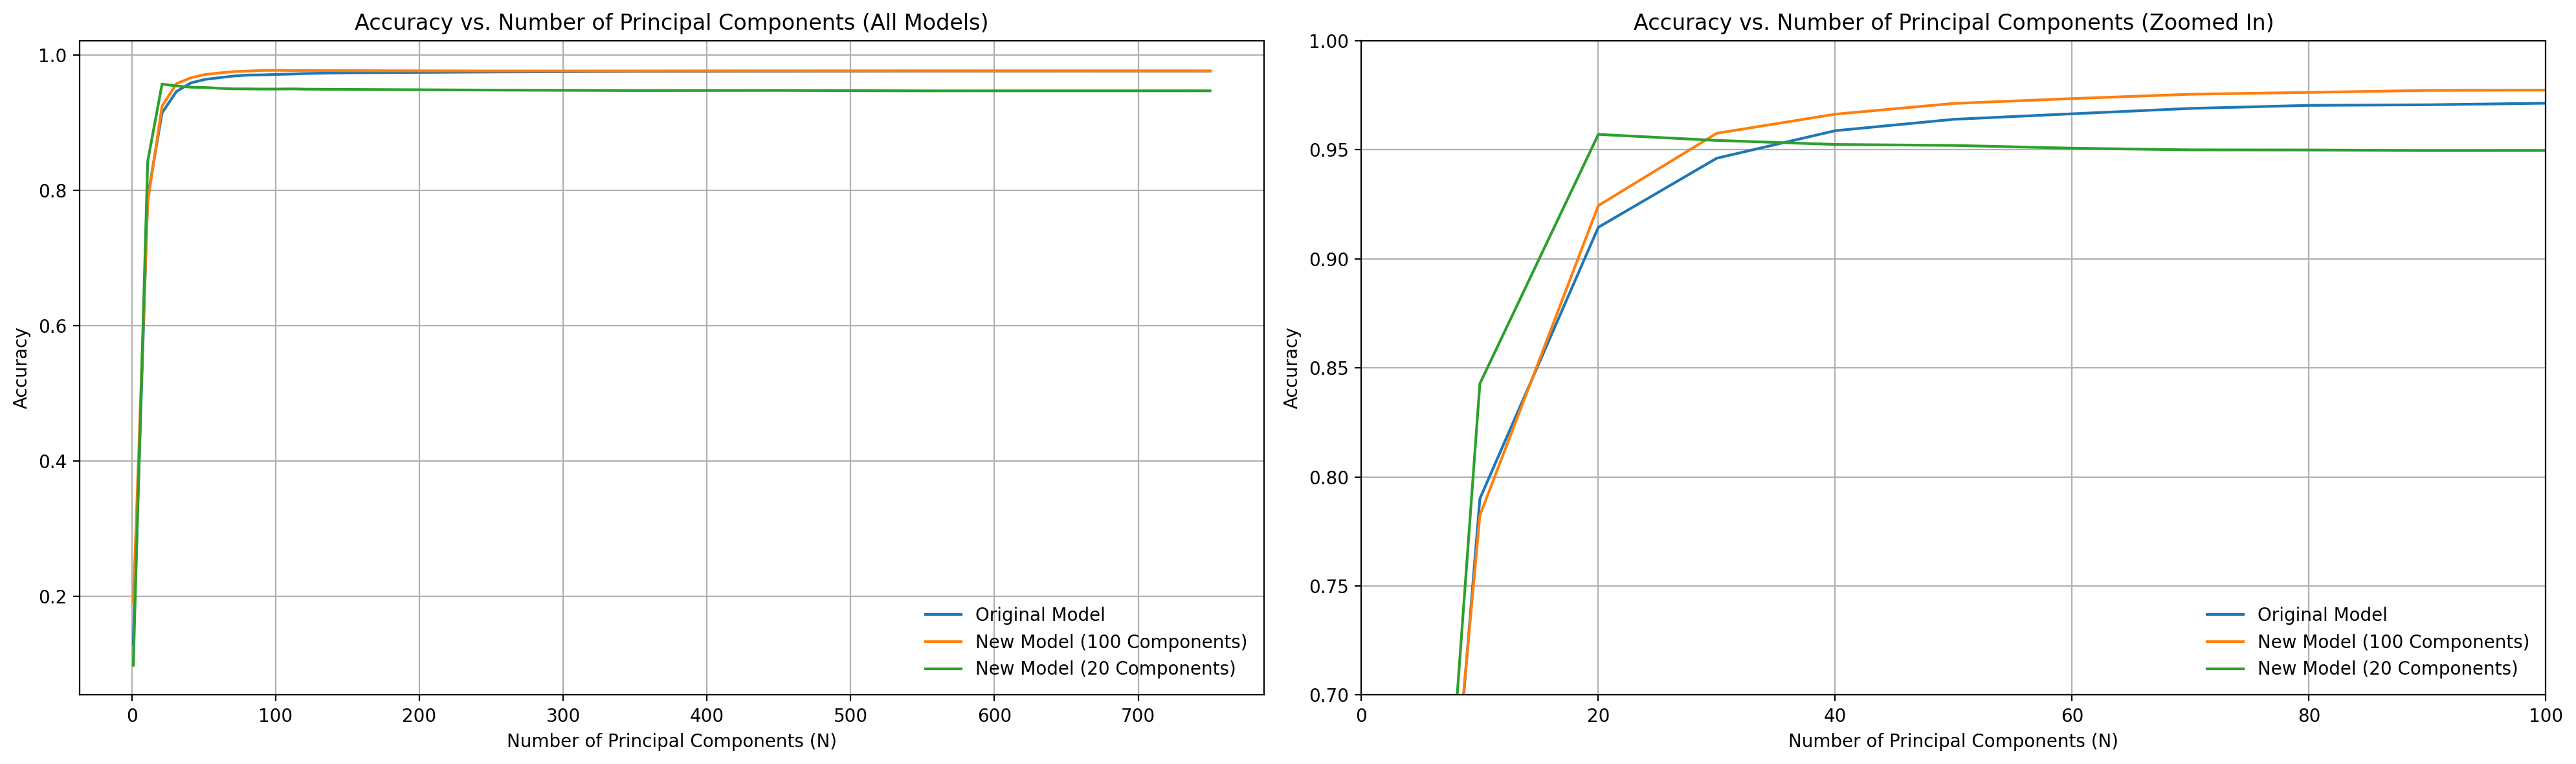

In [11]:
# N_components for the plot (0 to 100)
N_components_plot = list(range(0, 101,10))

# Adjust the accuracy lists to match N_components_plot if needed
# (e.g., if they have different lengths due to different N_components used earlier)
accuracies_plot = accuracies[:len(N_components_plot)]
accuracies_new_model_plot = accuracies_new_model[:len(N_components_plot)]
accuracies_new_model_20_plot = accuracies_new_model_20[:len(N_components_plot)]


# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Plot on the first subplot (ax1 - full range)
ax1.plot(N_components, accuracies, label="Original Model")
ax1.plot(N_components, accuracies_new_model, label="New Model (100 Components)")
ax1.plot(N_components, accuracies_new_model_20, label="New Model (20 Components)")
ax1.set_xlabel("Number of Principal Components (N)")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy vs. Number of Principal Components (All Models)")
ax1.legend()
ax1.grid(True)

# Plot on the second subplot (ax2 - zoomed-in)
ax2.plot(N_components_plot, accuracies_plot, label="Original Model")
ax2.plot(N_components_plot, accuracies_new_model_plot, label="New Model (100 Components)")
ax2.plot(N_components_plot, accuracies_new_model_20_plot, label="New Model (20 Components)")
ax2.set_xlabel("Number of Principal Components (N)")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy vs. Number of Principal Components (Zoomed In)")
ax2.legend()
ax2.grid(True)
ax2.set_xlim([0, 100])  # Set x-axis limits
ax2.set_ylim([0.7, 1])  # Set y-axis limits

plt.tight_layout() #added to make it slightly less bad
plt.show()

# **Analysis of the Accuracy vs. Number of Principal Components Graphs**

These two plots show how model accuracy changes with the number of principal components used in PCA. The left plot provides a **full view**, while the right plot zooms in on the lower range of components for a more detailed comparison.

---

## **Key Observations:**

### **1. Steep Accuracy Increase at Low Component Counts**
- All models show a sharp rise in accuracy when increasing the number of principal components from **0 to ~20**.
- This suggests that the first few components capture most of the essential variance in the dataset.

### **2. Performance Differences Between Models**
- The **original model** (blue line) starts at a slightly lower accuracy than the PCA-transformed models but converges as more components are added.
- The **new model with 20 components** (green line) reaches a high accuracy early but then **plateaus lower than the others**. This suggests that 20 components may not be enough to capture all key features for optimal classification.
- The **new model with 100 components** (orange line) closely follows the original model, indicating that 100 components retain nearly all the useful information.

### **3. Accuracy Plateauing at High Component Counts**
- Beyond **50-100 components**, there is little to no improvement in accuracy.
- This suggests that increasing the number of components beyond this point **does not significantly improve classification performance**.
- This aligns with the principle that PCA primarily removes redundancy, and after a certain number of components, most of the remaining ones contribute negligible information.

---

## **Conclusions & Recommendations**
✅ **Using around 50–100 principal components** appears to provide nearly the same accuracy as the full dataset while significantly reducing computational cost.  
✅ **Reducing to 20 components may not be enough**, as it leads to a slight drop in final accuracy.  
✅ **The zoomed-in plot (right) is particularly useful**, as it highlights the early trade-off between accuracy and component count.  
✅ **The optimal number of components depends on the trade-off you want**—if the goal is **maximum accuracy**, keeping more components is preferable. However, if **computational efficiency is a priority**, a lower number of components may be sufficient while still maintaining good performance.

*AI used for some descriptions and comments.*

In [12]:
print(f"Training time (Full Dataset): {training_time} seconds")
print(f"Training time (100 Components): {training_time_100} seconds")
print(f"Training time (20 Components): {training_time_20} seconds")

Training time (Full Dataset): 11.937357187271118 seconds
Training time (100 Components): 10.775492191314697 seconds
Training time (20 Components): 10.46151328086853 seconds
